This jupyter notebook shows how to use Fortuna to fit a simple model $f_\theta(x)$ over a dataset $\{x_k, y_k\}_1^N$.  

#### The model:
$f_\theta(x) = ax + c = \hat{y}$  
$a,c \in \theta$


#### The data:
D = [(0.5, -3.25), (1.0, -9.99), (4.0, 11.09), (4.1, 21.74), (4.2, 11.07), (6.0, 44.32), (7.0, 76.5), (9.1, 127.73)]

#### The data is generated using the following function:
$y = (1.5 * x^2) - 3.4 + \epsilon$  
$\epsilon \sim N(0, 10)$


#### Things you might want to try:
1) Change: N, the loss type
2) Change it so that 

In [329]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np

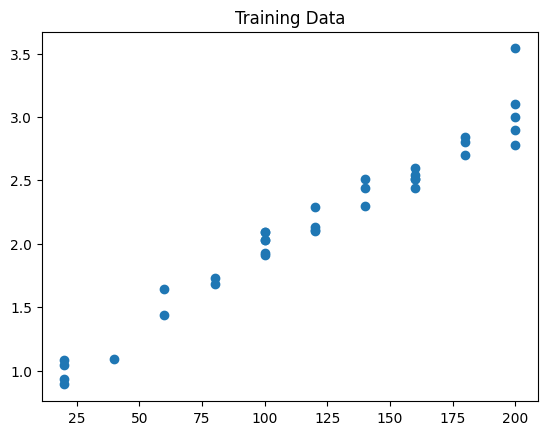

In [330]:
#
# Plot the data
#
# Høyde
xs = [120, 160, 80, 200, 120, 160, 100, 100, 40, 100, 160, 100, 120, 120, 100, 20, 200, 140, 140, 20, 60, 60, 20, 200, 100, 200, 80, 180, 180, 160, 160, 140, 200, 180, 20]

#Tid
ys = [2.11, 2.54, 1.73, 2.9, 2.1, 2.6, 1.91, 2.09, 1.09, 2.03, 2.51, 2.09, 2.29, 2.13, 1.93, 1.04, 3.54, 2.3, 2.51, 0.89, 1.44, 1.64, 0.93, 3.1, 2.03, 2.78, 1.68, 2.84, 2.7, 2.51, 2.44, 2.44, 3, 2.8, 1.08]

plt.scatter(xs, ys)
plt.title("Training Data")
plt.show()


In [331]:

def f(x, theta):
    """Our model: f(x) = a*x + c = y_hat
    
    We want to find the theta that makes this function best (according to our loss) describe the data.
    """
    a, b, c = theta
    y_hat = a*x**2 + b*x + c
    
    return y_hat
    
# example:
theta = (1.5,5,10) # a=1.5, c=5

x = 5
y_hat = f(x, theta) # y_hat = (5*1.5) + 5

print("f({}) = {}".format(x, y_hat))



f(5) = 72.5


In [332]:

def loss_function(ys, ys_hat, loss_type):
    
    loss = 0.0
    
    if loss_type == "L2":    
        for y, y_hat in zip(ys, ys_hat):
            loss += (y - y_hat)**2
            
    elif loss_type == "L1":
        for y, y_hat in zip(ys, ys_hat):
            loss += abs(y - y_hat)  # abs() is the absolute value
            
    
    return loss
            

Best loss we found was: 0.63
f(x) = -0.00*x^2 + 0.01*x + 0.73


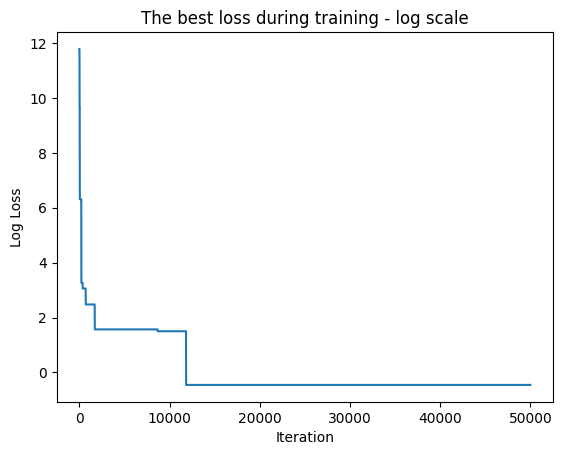

In [333]:

# Fortuna main code

N = 50000 # number of iterations (guesses the algorithm makes)

best_loss = float('inf') #Tracks the best loss
best_theta = None
best_loss_log = []

random.seed(42)
np.random.seed(42)

a_range = (-0.01, 0.01)
b_range = (0.01, 0.05)
c_range = (0, 1.6)


for n in range(N):
    
    # guess parameters: theta
    # a ~ U(-100, 100)
    # c ~ U(-100, 100)
    a = random.uniform(*a_range) # Randomly guesses a and c from -100 to 100
    b = random.uniform(*b_range)
    c = random.uniform(*c_range)
    theta = (a,b, c)
    
    #
    # Calculate what points our model guesses
    # y_hat = f(x_k, theta)
    #
    ys_hat = [f(x, theta) for x in xs]  # Use the model function with theta

    # Get the loss
    loss = loss_function(ys, ys_hat, "L2")  # Specify the loss type

    # If the loss is lower (the model is better) keep it, else guess a new version
    if loss < best_loss:
        best_loss = loss
        best_theta = theta

    best_loss_log.append(best_loss)

# Output the best parameters found
print("Best loss we found was: {:.2f}".format(best_loss))
print("f(x) = {:.2f}*x^2 + {:.2f}*x + {:.2f}".format(best_theta[0], best_theta[1], best_theta[2]))

# Plot the best loss during training on a log scale
plt.plot(np.log(best_loss_log))
plt.title("The best loss during training - log scale")
plt.xlabel("Iteration")
plt.ylabel("Log Loss")
plt.show()

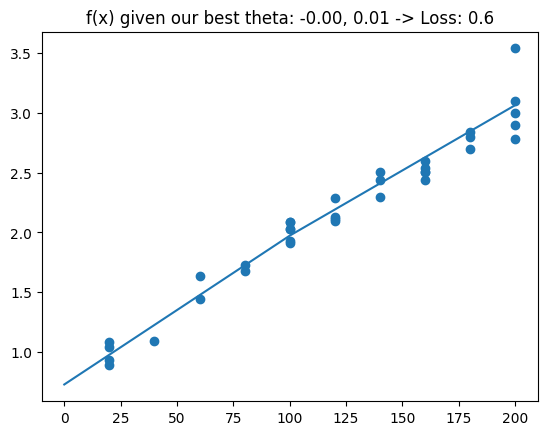

In [334]:

xs_predict = np.arange(0, 250, 100)
ys_predict = []


for x in xs_predict:
    y_hat = f(x, best_theta)
    ys_predict.append(y_hat)


plt.plot(xs_predict, ys_predict)
plt.scatter(xs, ys)

plt.title("f(x) given our best theta: {:.2f}, {:.2f} -> Loss: {:.1f}".format(best_theta[0], best_theta[1], best_loss,[2]))
plt.show()



In [335]:
from flask import Flask, request, render_template
from threading import Thread

app = Flask(__name__)

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')  # Renders the HTML file

@app.route('/predict', methods=['POST'])
def predict():
    # Get input from the form in the HTML
    time = float(request.form['time'])
    
    # Example of processing (replace this with your actual prediction logic)
    estimated_height = 43.86 * time + 74.25  # Placeholder model

    # Return the result back to the front-end
    return render_template('index.html', estimated_height=estimated_height)

def run_app():
    app.run(debug=True, use_reloader=False)

# Start the Flask app in a separate thread
flask_thread = Thread(target=run_app)
flask_thread.start()

 * Serving Flask app '__main__'
 * Debug mode: on
